 ## Подготовка окружения

In [ ]:
!pip install opendatasets


In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from pathlib import Path
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


## Загрузка данных

norgey

2e8b35025b7cb56fd3636ffb425b6d3b

In [ ]:
dataset_path = Path('credit-card-approval-prediction')
if not dataset_path.is_file():
    od.download('https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=application_record.csv')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: norgey
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction


100%|██████████| 5.32M/5.32M [00:00<00:00, 53.6MB/s]

In [ ]:
df_applications = pd.read_csv('credit-card-approval-prediction/application_record.csv')
df_credits = pd.read_csv('credit-card-approval-prediction/credit_record.csv')


## Просмотр данных

### Дата-фрейм информации о заёмщиках

__Поля дата-фрейма информации о заёмщиках:__


1) ID - идентификатор клиента (client number)

2) CODE_GENDER - пол клиента (gender):
*  M (мужчина)
*  F (женщина)

3) FLAG_OWN_CAR - наличие машины (if users have a car):
*   Y(да)
*   N (нет)

4) FLAG_OWN_REALTY - есть ли собственная недвижимость (Is there a property):
*   Y(да)
*   N (нет)

5) CNT_CHILDREN - количество детей (Number of children)

6) AMT_INCOME_TOTAL - годовой доход (Annual income)

7) NAME_INCOME_TYPE - категория основного дохода (Income category):
* Working (зарплата)
* Commercial associate (доход от бизнеса)
* State servant (государственное обеспечение)
* Pensioner (пенсия)
* Student (стипендия)

8) NAME_EDUCATION_TYPE - уровень образования (education level):
* Secondary / secondary special (Среднее / средне-специальное образование)
* Higher education (высшее образование)
* Incomplete higher (незаконченное высшее)
* Lower secondary (неполное среднее)
* Academic degree (научная степень)

9) NAME_FAMILY_STATUS - семейное положение (Marital status):
* Married (женат/замужем)
* Single / not married (не женат / не замужем)
* Civil marriage (в гражданском браке)
* Separated (в разводе)
* Widow (вдовец / вдова)

10) NAME_HOUSING_TYPE - где живёт (Way of living):
* House / apartment (собственные дом / квартира)
* Rented apartment (съёмное жильё)
* With parents (с родителями)
* Municipal apartment (муниципальная квартира)
* Co-op apartment (кооперативная квартира)
* Office apartment (офисная квартира)

11) DAYS_BIRTH - дата рождения
* 0 - текущий день
* -1 - предыдущий день
* ...
* -1500 - 1500 дней назад
* ...

12) DAYS_EMPLOYED	- дата приёма на первую работу (если значение положительное, то человек безработный)

13) FLAG_MOBIL - наличие мобильного телефона

14) FLAG_WORK_PHONE	- наличие рабочего телефона

15) FLAG_PHONE - наличие телефона

16) FLAG_EMAIL - наличие электронного почтового ящика

17) OCCUPATION_TYPE	- тип занятости:
* IT staff (ИТ-специалисты)
* High skill tech staff (высококвалифицированный технический персонал)
* HR staff (сотрудники отдела кадров)
* Realty agents (агенты по недвижимости)
* Managers (менеджеры)
* Sales staff (сотрудники отдела продаж)
* Accountants (бухгалтеры)
* Secretaries (секретари)
* Security staff (сотрудники службы безопасности)
* Medicine staff (медицинский персонал)
* Core staff (основной персонал)
* Private service staff (персонал частного обслуживания)
* Drivers (водители)
* Waiters/barmen staff (официанты / бармены)
* Cooking staff (повара)
* Laborers (разнорабочие)
* Cleaning staff (уборщики)
* Low-skill Laborers (разнорабочие низкой квалификации)
* NULL (не указано)

18) CNT_FAM_MEMBERS - размер семьи

In [ ]:
num_rows, num_cols = df_applications.shape
print(f"Количество строк: {num_rows:_}")
print(f"Количество столбцов: {num_cols}")

df_applications.tail()


Количество строк: 438_557
Количество столбцов: 18


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0


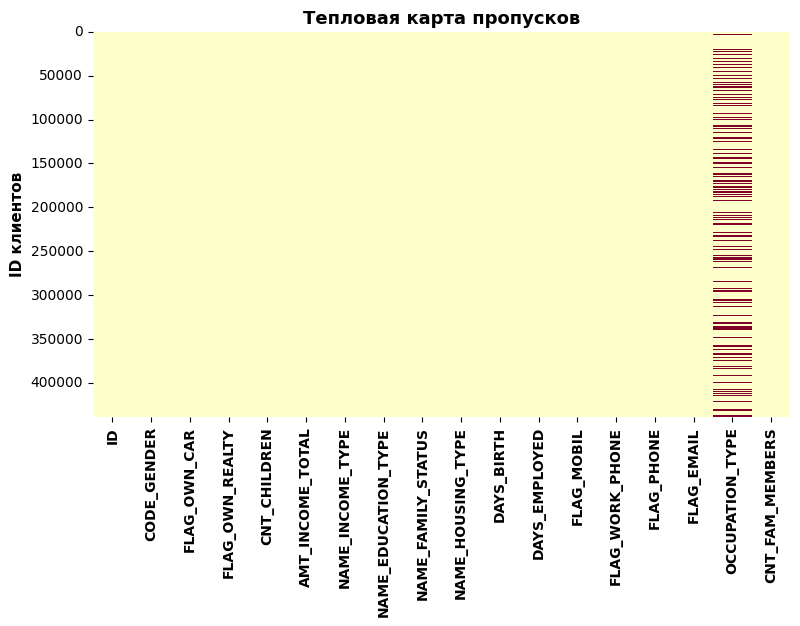

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))

sns.heatmap(df_applications.isna(), cmap="YlOrRd", cbar=False, ax=ax)
plt.title("Тепловая карта пропусков", fontsize=13, weight='bold')
ax.set_ylabel("ID клиентов", fontsize=11, weight='bold')
ax.tick_params(axis='both', labelsize=10)
ax.xaxis.set_ticklabels(ax.get_xticklabels(), fontweight='bold')

y_ticks_positions = range(0, len(df_applications.index), 50_000)
ax.set_yticks(y_ticks_positions)
ax.set_yticklabels(df_applications.index[y_ticks_positions])

plt.show()


In [ ]:
df_applications.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
df_applications.describe().T.style.background_gradient(cmap='YlOrRd')


,count,mean,std,min,25%,50%,75%,max
ID,438557.000000,6022176.269842,571637.023257,5008804.000000,5609375.000000,6047745.000000,6456971.000000,7999952.000000
CNT_CHILDREN,438557.000000,0.427390,0.724882,0.000000,0.000000,0.000000,1.000000,19.000000
AMT_INCOME_TOTAL,438557.000000,187524.286010,110086.853066,26100.000000,121500.000000,160780.500000,225000.000000,6750000.000000
DAYS_BIRTH,438557.000000,-15997.904649,4185.030007,-25201.000000,-19483.000000,-15630.000000,-12514.000000,-7489.000000
DAYS_EMPLOYED,438557.000000,60563.675328,138767.799647,-17531.000000,-3103.000000,-1467.000000,-371.000000,365243.000000
FLAG_MOBIL,438557.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
FLAG_WORK_PHONE,438557.000000,0.206133,0.404527,0.000000,0.000000,0.000000,0.000000,1.000000
FLAG_PHONE,438557.000000,0.287771,0.452724,0.000000,0.000000,0.000000,1.000000,1.000000
FLAG_EMAIL,438557.000000,0.108207,0.310642,0.000000,0.000000,0.000000,0.000000,1.000000
CNT_FAM_MEMBERS,438557.000000,2.194465,0.897207,1.000000,2.000000,2.000000,3.000000,20.000000


In [ ]:
df_applications.fillna('NULL', inplace=True)
total_rows = len(df_applications)

for column in df_applications.select_dtypes(include=['object']).columns:
    print(f"\nУникальные значения в столбце '{column}':")
    unique_values_counts = df_applications[column].value_counts()

    for value, count in unique_values_counts.items():
        if value == '':
            print(f"'{value}': {count} ({(count / total_rows) * 100:.3f}%)")
        else:
            percentage = (count / total_rows) * 100
            print(f"{value}: {count:_} ({percentage:.3f}%)")



Уникальные значения в столбце 'CODE_GENDER':
F: 294_440 (67.138%)
M: 144_117 (32.862%)

Уникальные значения в столбце 'FLAG_OWN_CAR':
N: 275_459 (62.810%)
Y: 163_098 (37.190%)

Уникальные значения в столбце 'FLAG_OWN_REALTY':
Y: 304_074 (69.335%)
N: 134_483 (30.665%)

Уникальные значения в столбце 'NAME_INCOME_TYPE':
Working: 226_104 (51.556%)
Commercial associate: 100_757 (22.975%)
Pensioner: 75_493 (17.214%)
State servant: 36_186 (8.251%)
Student: 17 (0.004%)

Уникальные значения в столбце 'NAME_EDUCATION_TYPE':
Secondary / secondary special: 301_821 (68.821%)
Higher education: 117_522 (26.797%)
Incomplete higher: 14_851 (3.386%)
Lower secondary: 4_051 (0.924%)
Academic degree: 312 (0.071%)

Уникальные значения в столбце 'NAME_FAMILY_STATUS':
Married: 299_828 (68.367%)
Single / not married: 55_271 (12.603%)
Civil marriage: 36_532 (8.330%)
Separated: 27_251 (6.214%)
Widow: 19_675 (4.486%)

Уникальные значения в столбце 'NAME_HOUSING_TYPE':
House / apartment: 393_831 (89.802%)
With pa

### Дата-фрейм о кредитной истории

__Поля дата-фрейма о кредитной истории:__

1) ID - идентификатор клиента (client number)

2) MONTHS_BALANCE	- изменение статуса задолженности на кредитной карте:
* 0 - текущий месяц
* -1 - предыдущий месяц
* ...
* -29 - 29 месяцев назад

3) STATUS:
* 0: просрочка на 1-29 дней
* 1: просрочка на 30-59 дней
* 2: просрочка на 60-89 дней
* 3: просрочка на 90-119 дней
* 4: просрочка на 120-149 дней
* 5: Просроченные или безнадежные долги, списанные более чем на 150 дней
* C: погашены в этом месяце
* X: За месяц займа не было

In [ ]:
num_rows, num_cols = df_credits.shape
print(f"Количество строк: {num_rows:_}")
print(f"Количество столбцов: {num_cols}")

df_credits.head(25)


Количество строк: 1_048_575
Количество столбцов: 3


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [ ]:
df_credits.tail(31)


,ID,MONTHS_BALANCE,STATUS
1048544,5150485,-1,0
1048545,5150487,0,C
1048546,5150487,-1,C
1048547,5150487,-2,C
1048548,5150487,-3,C
1048549,5150487,-4,C
1048550,5150487,-5,C
1048551,5150487,-6,C
1048552,5150487,-7,C
1048553,5150487,-8,C


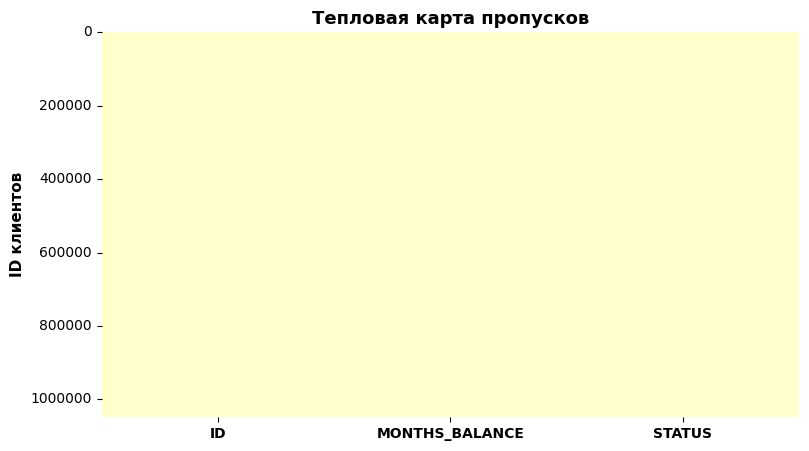

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))

sns.heatmap(df_credits.isna(), cmap="YlOrRd", cbar=False, ax=ax)
plt.title("Тепловая карта пропусков", fontsize=13, weight='bold')
ax.set_ylabel("ID клиентов", fontsize=11, weight='bold')
ax.tick_params(axis='both', labelsize=10)
ax.xaxis.set_ticklabels(ax.get_xticklabels(), fontweight='bold')

y_ticks_positions = range(0, len(df_credits.index), 200_000)
ax.set_yticks(y_ticks_positions)
ax.set_yticklabels(df_credits.index[y_ticks_positions])

plt.show()



In [ ]:
df_credits.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
df_credits.describe().T.style.background_gradient(cmap='YlOrRd')


,count,mean,std,min,25%,50%,75%,max
ID,1048575.000000,5068286.424673,46150.578505,5001711.000000,5023644.000000,5062104.000000,5113856.000000,5150487.000000
MONTHS_BALANCE,1048575.000000,-19.136998,14.023498,-60.000000,-29.000000,-17.000000,-7.000000,0.000000


In [ ]:
total_rows = len(df_credits)

for column in df_credits.select_dtypes(include=['object']).columns:
    print(f"\nУникальные значения в столбце '{column}':")
    unique_values_counts = df_credits[column].value_counts()

    for value, count in unique_values_counts.items():
      percentage = (count / total_rows) * 100
      print(f"{value}: {count:_} ({percentage:.3f}%)")



Уникальные значения в столбце 'STATUS':
C: 442_031 (42.155%)
0: 383_120 (36.537%)
X: 209_230 (19.954%)
1: 11_090 (1.058%)
5: 1_693 (0.161%)
2: 868 (0.083%)
3: 320 (0.031%)
4: 223 (0.021%)


STATUS:
* 0: просрочка на 1-29 дней
* 1: просрочка на 30-59 дней
* 2: просрочка на 60-89 дней
* 3: просрочка на 90-119 дней
* 4: просрочка на 120-149 дней
* 5: Просроченные или безнадежные долги, списанные более чем на 150 дней
* C: погашены в этом месяце
* X: За месяц займа не было

## Предобработка и разметка данных

In [ ]:
# Удалим не информативные поля о наличии телефона и почты
columns_drop = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
df_applications.drop(columns_drop, axis=1, inplace=True)

# Пометим пропущенные значения, как 'NULL'
df_applications.fillna('NULL', inplace=True)


In [ ]:
# Объединим дата-фреймы по полю ID
# Теперь для одного клиента в таблице будет соответсвовать не 1 строка, а несколько строк.
# Каждая строка отражает статическую информацию и клиенте и динамическое изменение
# состояния кредитной карты по месяцам (1 строка = состояние в 1 месяце)

merged_df = pd.merge(df_applications, df_credits, on='ID', how='inner')
total_nulls = merged_df.isnull().sum().sum()
print(f"\nОбщее количество пропущенных ячеек: {total_nulls}")

# Сделаем отдельный дата-фрейм с русским текстом
merged_df_rus = pd.merge(df_applications, df_credits, on='ID', how='inner')
total_nulls_rus = merged_df_rus.isnull().sum().sum()
print(f"\nОбщее количество пропущенных ячеек: {total_nulls_rus}")



Общее количество пропущенных ячеек: 0

Общее количество пропущенных ячеек: 0


In [ ]:
# Перепишем метки столбцов из кодовых значений в развёрнутые

gender_labels = {'M': 'Male', 'F': 'Female'}
status_labels = {'0': '1-29 days due', '1': '30-59 days due', '2': '60-89 days due', '3': '90-119 days due',
                 '4': '120-149 days due', '5': '150+ days/write-offs', 'C': 'Paid off', 'X': 'No loan'}
realty_labels = {'Y': 'Yes Property', 'N': 'No Property'}
car_labels = {'Y': 'Yes Car', 'N': 'No Car'}


merged_df['CODE_GENDER'] = merged_df['CODE_GENDER'].replace(gender_labels)
merged_df['STATUS'] = merged_df['STATUS'].replace(status_labels)
merged_df['FLAG_OWN_REALTY'] = merged_df['FLAG_OWN_REALTY'].replace(realty_labels)
merged_df['FLAG_OWN_CAR'] = merged_df['FLAG_OWN_CAR'].replace(car_labels)


gender_labels_rus = {'M': 'Мужчины', 'F': 'Женщины'}
car_labels_rus = {'Y': 'Есть машина', 'N': 'Нет машины'}
realty_labels_rus = {'Y': 'Есть недвижимость', 'N': 'Нет недвижимости'}
status_labels_rus = {'0': '1-29 дней просрочки', '1': '30-59 дней просрочки', '2': '60-89 дней просрочки', '3': '90-119 дней просрочки',
                 '4': '120-149 дней просрочки', '5': 'безнадёжный долг', 'C': 'Задолженость погашена', 'X': 'Задолженности не было'}
income_group_labels_rus = {'Working': 'Зарплата', 'Commercial associate': 'Доход от бизнеса',
                       'Pensioner': 'Пенсия', 'State servant': 'Гос.обеспечение', 'Student': 'Стипендия'}
education_labels_rus = {'Secondary / secondary special': 'Среднее/средне-специальное',
                        'Higher education': 'Высшее',
                        'Incomplete higher': 'Незаконченное высшее',
                        'Lower secondary': 'Неполное среднее',
                        'Academic degree': 'Научная степень'}
family_labels_rus = {'Married': 'Женат/Замужем', 'Single / not married': 'Не женат/Не замужем',
                     'Civil marriage': 'Гражданский брак', 'Separated': 'В разводе',
                     'Widow': 'вдова/вдовец'}
housing_labels_rus = {'House / apartment': 'Cобственные дом/квартира',
                      'With parents': 'С родителями',
                      'Municipal apartment': 'Муниципальная квартира',
                      'Rented apartment': 'Съёмное жильё',
                      'Office apartment': 'Офисная квартира',
                      'Co-op apartment': 'Кооперативная квартира'}
occupation_labels_rus = {'NULL': 'Остальные',
                         'Laborers': 'Разнорабочие',
                         'Core staff': 'Основной персонал',
                         'Sales staff': 'Кассиры/Консультанты',
                         'Managers': 'Менеджеры',
                         'Drivers': 'Водители',
                         'High skill tech staff': 'Инженеры',
                         'Accountants': 'Бухгалтеры',
                         'Medicine staff': 'Медицинский персонал',
                         'Cooking staff': 'Повара',
                         'Security staff': 'Сотрудники службы безопасности',
                         'Cleaning staff': 'Уборщики/Дворники',
                         'Private service staff': 'Персонал частного обслуживания',
                         'Low-skill Laborers': 'Разнорабочие низкой квалификации',
                         'Secretaries': 'Секретари',
                         'Waiters/barmen staff': 'Официанты/Бармены',
                         'HR staff': 'Сотрудники отдела кадров',
                         'IT staff': 'IT-специалисты',
                         'Realty agents': 'Агенты по недвижимости'}

merged_df_rus['CODE_GENDER'] = merged_df_rus['CODE_GENDER'].replace(gender_labels_rus)
merged_df_rus['FLAG_OWN_CAR'] = merged_df_rus['FLAG_OWN_CAR'].replace(car_labels_rus)
merged_df_rus['FLAG_OWN_REALTY'] = merged_df_rus['FLAG_OWN_REALTY'].replace(realty_labels_rus)
merged_df_rus['STATUS'] = merged_df_rus['STATUS'].replace(status_labels_rus)
merged_df_rus['NAME_INCOME_TYPE'] = merged_df_rus['NAME_INCOME_TYPE'].replace(income_group_labels_rus)
merged_df_rus['NAME_EDUCATION_TYPE'] = merged_df_rus['NAME_EDUCATION_TYPE'].replace(education_labels_rus)
merged_df_rus['NAME_FAMILY_STATUS'] = merged_df_rus['NAME_FAMILY_STATUS'].replace(family_labels_rus)
merged_df_rus['NAME_HOUSING_TYPE'] = merged_df_rus['NAME_HOUSING_TYPE'].replace(housing_labels_rus)
merged_df_rus['OCCUPATION_TYPE'] = merged_df_rus['OCCUPATION_TYPE'].replace(occupation_labels_rus)


In [ ]:
total_rows = len(merged_df)

print(f"\nУникальные значения в столбце 'STATUS':")
unique_values_counts = merged_df['STATUS'].value_counts()

for value, count in unique_values_counts.items():
    percentage = (count / total_rows) * 100
    print(f"{value}: {count:_} ({percentage:.3f}%)")


print(f"\nУникальные значения в столбце 'STATUS':")
unique_values_counts = merged_df_rus['STATUS'].value_counts()

for value, count in unique_values_counts.items():
    percentage = (count / total_rows) * 100
    print(f"{value}: {count:_} ({percentage:.3f}%)")



Уникальные значения в столбце 'STATUS':
Paid off: 329_536 (42.372%)
1-29 days due: 290_654 (37.373%)
No loan: 145_950 (18.767%)
30-59 days due: 8_747 (1.125%)
150+ days/write-offs: 1_527 (0.196%)
60-89 days due: 801 (0.103%)
90-119 days due: 286 (0.037%)
120-149 days due: 214 (0.028%)

Уникальные значения в столбце 'STATUS':
Задолженость погашена: 329_536 (42.372%)
1-29 дней просрочки: 290_654 (37.373%)
Задолженности не было: 145_950 (18.767%)
30-59 дней просрочки: 8_747 (1.125%)
безнадёжный долг: 1_527 (0.196%)
60-89 дней просрочки: 801 (0.103%)
90-119 дней просрочки: 286 (0.037%)
120-149 дней просрочки: 214 (0.028%)


In [ ]:
# Преобразуем во временной формат поля дня рождения, приёма на работу и поле пользования кредитной картой

merged_df['DAYS_BIRTH_DT'] = datetime.strptime("2024-01-01", "%Y-%m-%d") + merged_df['DAYS_BIRTH'].apply(pd.offsets.Day)
merged_df['DAYS_BIRTH_DT'] = pd.to_datetime(merged_df['DAYS_BIRTH_DT'])
merged_df['DAYS_BIRTH_DT'] = merged_df['DAYS_BIRTH_DT'].dt.date

# В поле времени приёма на работу безработные имеют положительное значение, заменим их на 0
merged_df.loc[merged_df['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
merged_df['DAYS_EMPLOYED_DT'] = datetime.strptime("2024-01-01", "%Y-%m-%d") + merged_df['DAYS_EMPLOYED'].apply(pd.offsets.Day)
merged_df['DAYS_EMPLOYED_DT'] = pd.to_datetime(merged_df['DAYS_EMPLOYED_DT'])
merged_df['DAYS_EMPLOYED_DT'] = merged_df['DAYS_EMPLOYED_DT'].dt.date

merged_df['MONTHS_BALANCE_DT'] = datetime.strptime("2024-01-01", "%Y-%m-%d") + 30 * merged_df['MONTHS_BALANCE'].apply(pd.offsets.Day)
merged_df['MONTHS_BALANCE_DT'] = pd.to_datetime(merged_df['MONTHS_BALANCE_DT'])
merged_df['MONTHS_BALANCE_DT'] = merged_df['MONTHS_BALANCE_DT'].dt.date


merged_df_rus['DAYS_BIRTH_DT'] = datetime.strptime("2024-01-01", "%Y-%m-%d") + merged_df_rus['DAYS_BIRTH'].apply(pd.offsets.Day)
merged_df_rus['DAYS_BIRTH_DT'] = pd.to_datetime(merged_df_rus['DAYS_BIRTH_DT'])
merged_df_rus['DAYS_BIRTH_DT'] = merged_df_rus['DAYS_BIRTH_DT'].dt.date

# В поле времени приёма на работу безработные имеют положительное значение, заменим их на 0
merged_df_rus.loc[merged_df_rus['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
merged_df_rus['DAYS_EMPLOYED_DT'] = datetime.strptime("2024-01-01", "%Y-%m-%d") + merged_df_rus['DAYS_EMPLOYED'].apply(pd.offsets.Day)
merged_df_rus['DAYS_EMPLOYED_DT'] = pd.to_datetime(merged_df_rus['DAYS_EMPLOYED_DT'])
merged_df_rus['DAYS_EMPLOYED_DT'] = merged_df_rus['DAYS_EMPLOYED_DT'].dt.date

merged_df_rus['MONTHS_BALANCE_DT'] = datetime.strptime("2024-01-01", "%Y-%m-%d") + 30 * merged_df_rus['MONTHS_BALANCE'].apply(pd.offsets.Day)
merged_df_rus['MONTHS_BALANCE_DT'] = pd.to_datetime(merged_df_rus['MONTHS_BALANCE_DT'])
merged_df_rus['MONTHS_BALANCE_DT'] = merged_df_rus['MONTHS_BALANCE_DT'].dt.date


In [ ]:
# Постмавим метки давности получения кредита в новый столбец TIME_PERIOD
bins = [-61, -48, -36, -24, -12, -6, 1]

labels = ['4-5 years ago', '3-4 years ago', '2-3 years ago', '1-2 years ago', '6-12 months ago', 'Within 6 months']
merged_df['MONTHS_BALANCE_PERIOD'] = pd.cut(merged_df['MONTHS_BALANCE'], bins=bins, labels=labels, right=False)

labels_rus = ['4-5 лет назад', '3-4 года назад', '2-3 года назад', '1-2 года назад', '6-12 месяцев назад', 'Меньше 6 месяцев']
merged_df_rus['MONTHS_BALANCE_PERIOD'] = pd.cut(merged_df_rus['MONTHS_BALANCE'], bins=bins, labels=labels_rus, right=False)


Введём классификацию клиентов по доходу:
* Very Low income - очень низкий доход (<81_000)
* Low income - низкий доход (>81_000 - 135_000)
* Lower-middle income - доход ниже среднего уровня (>135_000 - 157_500)
* Middle income - средний доход (>157_500 - 180_000)
* Upper-middle income - доход выше среднего уровня (>180_000 - 205_000)
* Moderate-high income - умеренно-высокий доход (>205_000 - 230_000)
* High income - высокий доход (>230_000 - 900_000)
* Very High income - сверх высокий доход (>900_000)

In [ ]:
# Определим 8 групп по годовому доходу и добавим информацию в столбец INCOME_GROUP
income_bins = [27000, (27000 + 135000) / 2, 135000, (135000 + 180000) / 2, 180000, (180000 + 229500) / 2,
               229500, (229500 + 1575000) / 2, 1575000]

income_labels = ['Very Low income', 'Low income', 'Lower-middle income', 'Middle income',
                 'Upper-middle income', 'Moderate-high income', 'High income', 'Very High income']
income_labels_rus = ['Очень низкий доход', 'Низкий доход ', 'Доход ниже среднего уровня', 'Средний доход',
                 'Доход выше среднего уровня', 'Умеренно-высокий доход', 'Высокий доход', 'Сверхвысокий доход']

merged_df['INCOME_GROUP'] = pd.cut(merged_df['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels, include_lowest=True)
merged_df_rus['INCOME_GROUP'] = pd.cut(merged_df_rus['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels_rus, include_lowest=True)


In [ ]:
total_rows = len(merged_df)

print(f"\nУникальные значения в столбце 'INCOME_GROUP':")
unique_values_counts = merged_df['INCOME_GROUP'].value_counts()

for value, count in unique_values_counts.items():
    percentage = (count / total_rows) * 100
    print(f"{value}: {count:_} ({percentage:.3f}%)")

grouped_data = merged_df.groupby('INCOME_GROUP').agg({'AMT_INCOME_TOTAL': ['min', 'max']})
print(f'\n\n{grouped_data}')

print(f"\nУникальные значения в столбце 'INCOME_GROUP':")
unique_values_counts = merged_df_rus['INCOME_GROUP'].value_counts()

for value, count in unique_values_counts.items():
    percentage = (count / total_rows) * 100
    print(f"{value}: {count:_} ({percentage:.3f}%)")

grouped_data = merged_df_rus.groupby('INCOME_GROUP').agg({'AMT_INCOME_TOTAL': ['min', 'max']})
print(f'\n\n{grouped_data}')



Уникальные значения в столбце 'INCOME_GROUP':
Low income: 247_943 (31.881%)
High income: 171_203 (22.014%)
Middle income: 86_529 (11.126%)
Lower-middle income: 83_817 (10.777%)
Moderate-high income: 75_164 (9.665%)
Upper-middle income: 58_717 (7.550%)
Very Low income: 53_933 (6.935%)
Very High income: 409 (0.053%)


                     AMT_INCOME_TOTAL           
                                  min        max
INCOME_GROUP                                    
Very Low income               27000.0    81000.0
Low income                    82350.0   135000.0
Lower-middle income          139050.0   157500.0
Middle income                159750.0   180000.0
Upper-middle income          184135.5   204750.0
Moderate-high income         206100.0   229500.0
High income                  231750.0   900000.0
Very High income             945000.0  1575000.0

Уникальные значения в столбце 'INCOME_GROUP':
Низкий доход : 247_943 (31.881%)
Высокий доход: 171_203 (22.014%)
Средний доход: 86_529 (11.126

In [ ]:
credit_labels = {'1-29 days due' : 'good_debt',
                 '30-59 days due' : 'bad_debt',
                 '60-89 days due' : 'bad_debt',
                 '90-119 days due' : 'bad_debt',
                 '120-149 days due' : 'bad_debt',
                 '150+ days/write-offs' : 'bad_debt',
                 'Paid off' : 'good_debt',
                 'No loan' : 'good_debt'}
credit_labels_rus = {'1-29 days due' : 'Хороший долг',
                     '30-59 days due' : 'Плохой долг',
                     '60-89 days due' : 'Плохой долг',
                     '90-119 days due' : 'Плохой долг',
                     '120-149 days due' : 'Плохой долг',
                     '150+ days/write-offs' : 'Плохой долг',
                     'Paid off' : 'Хороший долг',
                     'No loan' : 'Хороший долг'}

merged_df['CREDIT_CHARACTERISTICS'] = merged_df['STATUS'].map(credit_labels)
merged_df_rus['CREDIT_CHARACTERISTICS'] = merged_df['STATUS'].map(credit_labels_rus)


In [ ]:
total_rows = len(merged_df)

print(f"\nУникальные значения в столбце 'CREDIT_CHARACTERISTICS':")
unique_values_counts = merged_df['CREDIT_CHARACTERISTICS'].value_counts()

for value, count in unique_values_counts.items():
    percentage = (count / total_rows) * 100
    print(f"{value}: {count:_} ({percentage:.3f}%)")

print(f"\nУникальные значения в столбце 'CREDIT_CHARACTERISTICS':")
unique_values_counts = merged_df_rus['CREDIT_CHARACTERISTICS'].value_counts()

for value, count in unique_values_counts.items():
    percentage = (count / total_rows) * 100
    print(f"{value}: {count:_} ({percentage:.3f}%)")



Уникальные значения в столбце 'CREDIT_CHARACTERISTICS':
good_debt: 766_140 (98.512%)
bad_debt: 11_575 (1.488%)

Уникальные значения в столбце 'CREDIT_CHARACTERISTICS':
Хороший долг: 766_140 (98.512%)
Плохой долг: 11_575 (1.488%)


In [ ]:
new_columns_order = ['ID', 'CODE_GENDER', 'DAYS_BIRTH', 'DAYS_BIRTH_DT', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                     'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'INCOME_GROUP', 'AMT_INCOME_TOTAL',
                     'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE',
                     'NAME_FAMILY_STATUS', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
                     'DAYS_EMPLOYED', 'DAYS_EMPLOYED_DT',
                     'MONTHS_BALANCE', 'MONTHS_BALANCE_DT', 'MONTHS_BALANCE_PERIOD',
                     'STATUS', 'CREDIT_CHARACTERISTICS']

df = merged_df[new_columns_order]
df_rus = merged_df_rus[new_columns_order]


In [ ]:
# Замена выбросов
df.loc[df['CNT_CHILDREN'] > 14, 'CNT_CHILDREN'] = 14
df_rus.loc[df_rus['CNT_CHILDREN'] > 14, 'CNT_CHILDREN'] = 14

df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype(int)
df_rus['CNT_FAM_MEMBERS'] = df_rus['CNT_FAM_MEMBERS'].astype(int)

df.loc[df['CNT_FAM_MEMBERS'] > 15, 'CNT_FAM_MEMBERS'] = 15
df_rus.loc[df_rus['CNT_FAM_MEMBERS'] > 15, 'CNT_FAM_MEMBERS'] = 15


In [ ]:
df.head()


,ID,CODE_GENDER,DAYS_BIRTH,DAYS_BIRTH_DT,FLAG_OWN_CAR,FLAG_OWN_REALTY,OCCUPATION_TYPE,NAME_INCOME_TYPE,INCOME_GROUP,AMT_INCOME_TOTAL,...,NAME_FAMILY_STATUS,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_EMPLOYED,DAYS_EMPLOYED_DT,MONTHS_BALANCE,MONTHS_BALANCE_DT,MONTHS_BALANCE_PERIOD,STATUS,CREDIT_CHARACTERISTICS
0,5008804,Male,-12005,1991-02-18,Yes Car,Yes Property,NULL,Working,High income,427500.0,...,Civil marriage,0,2,-4542,2011-07-26,0,2024-01-01,Within 6 months,Paid off,good_debt
1,5008804,Male,-12005,1991-02-18,Yes Car,Yes Property,NULL,Working,High income,427500.0,...,Civil marriage,0,2,-4542,2011-07-26,-1,2023-12-02,Within 6 months,Paid off,good_debt
2,5008804,Male,-12005,1991-02-18,Yes Car,Yes Property,NULL,Working,High income,427500.0,...,Civil marriage,0,2,-4542,2011-07-26,-2,2023-11-02,Within 6 months,Paid off,good_debt
3,5008804,Male,-12005,1991-02-18,Yes Car,Yes Property,NULL,Working,High income,427500.0,...,Civil marriage,0,2,-4542,2011-07-26,-3,2023-10-03,Within 6 months,Paid off,good_debt
4,5008804,Male,-12005,1991-02-18,Yes Car,Yes Property,NULL,Working,High income,427500.0,...,Civil marriage,0,2,-4542,2011-07-26,-4,2023-09-03,Within 6 months,Paid off,good_debt


In [ ]:
df_rus.head()


,ID,CODE_GENDER,DAYS_BIRTH,DAYS_BIRTH_DT,FLAG_OWN_CAR,FLAG_OWN_REALTY,OCCUPATION_TYPE,NAME_INCOME_TYPE,INCOME_GROUP,AMT_INCOME_TOTAL,...,NAME_FAMILY_STATUS,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_EMPLOYED,DAYS_EMPLOYED_DT,MONTHS_BALANCE,MONTHS_BALANCE_DT,MONTHS_BALANCE_PERIOD,STATUS,CREDIT_CHARACTERISTICS
0,5008804,Мужчины,-12005,1991-02-18,Есть машина,Есть недвижимость,Остальные,Зарплата,Высокий доход,427500.0,...,Гражданский брак,0,2,-4542,2011-07-26,0,2024-01-01,Меньше 6 месяцев,Задолженость погашена,Хороший долг
1,5008804,Мужчины,-12005,1991-02-18,Есть машина,Есть недвижимость,Остальные,Зарплата,Высокий доход,427500.0,...,Гражданский брак,0,2,-4542,2011-07-26,-1,2023-12-02,Меньше 6 месяцев,Задолженость погашена,Хороший долг
2,5008804,Мужчины,-12005,1991-02-18,Есть машина,Есть недвижимость,Остальные,Зарплата,Высокий доход,427500.0,...,Гражданский брак,0,2,-4542,2011-07-26,-2,2023-11-02,Меньше 6 месяцев,Задолженость погашена,Хороший долг
3,5008804,Мужчины,-12005,1991-02-18,Есть машина,Есть недвижимость,Остальные,Зарплата,Высокий доход,427500.0,...,Гражданский брак,0,2,-4542,2011-07-26,-3,2023-10-03,Меньше 6 месяцев,Задолженость погашена,Хороший долг
4,5008804,Мужчины,-12005,1991-02-18,Есть машина,Есть недвижимость,Остальные,Зарплата,Высокий доход,427500.0,...,Гражданский брак,0,2,-4542,2011-07-26,-4,2023-09-03,Меньше 6 месяцев,Задолженость погашена,Хороший долг


## EDA

### Простые графики

Text(0.5, 1.0, 'Структура выданных кредитов')

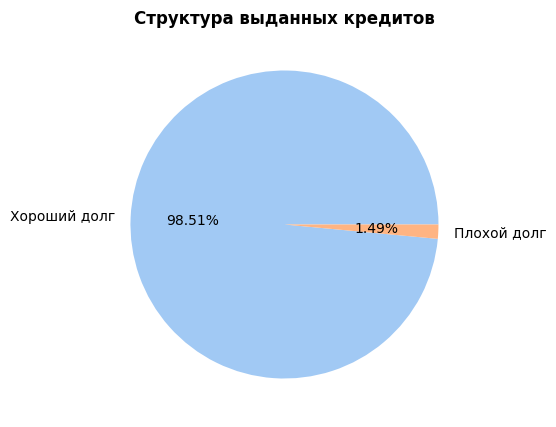

In [ ]:
# Круговая диаграмма соотношения плохого и хорошего долга
credit_counts = df_rus['CREDIT_CHARACTERISTICS'].value_counts()
credit_ratios = credit_counts / credit_counts.sum()

colors = sns.color_palette('pastel')
fig = plt.subplots(figsize=(8, 5))

plt.pie(credit_ratios, labels=credit_ratios.index, autopct='%1.2f%%', colors=colors)
plt.title('Структура выданных кредитов', fontweight='bold')


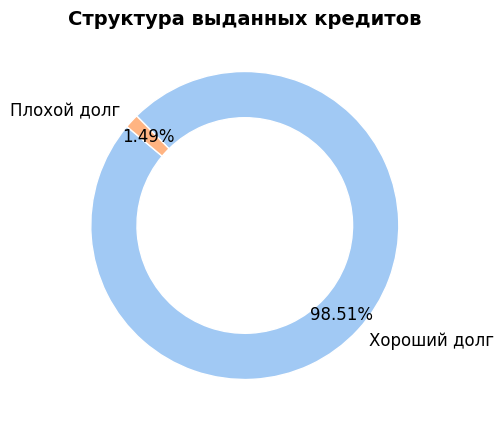

In [ ]:
# Подсчитаем соотношение плохого и хорошего долга
credit_counts = df_rus['CREDIT_CHARACTERISTICS'].value_counts()
credit_ratios = credit_counts / credit_counts.sum()

# Установим цветовую палитру
colors = sns.color_palette('pastel')

# Создадим круговую диаграмму
fig, ax = plt.subplots(figsize=(8, 5))

# Построим диаграмму, разместив подписи внутри сегментов
wedges, texts, autotexts = ax.pie(credit_ratios, labels=credit_ratios.index, autopct='%1.2f%%', colors=colors,
                                  startangle=140, wedgeprops=dict(width=0.3), pctdistance=0.85)

# Настроим стили подписей
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_color('black')

# Настроим стили сегментов
for wedge in wedges:
    wedge.set_edgecolor('white')

# Установим заголовок
ax.set_title('Структура выданных кредитов', fontweight='bold', fontsize=14)

plt.show()


Text(0.5, 1.0, 'Плохие долги')

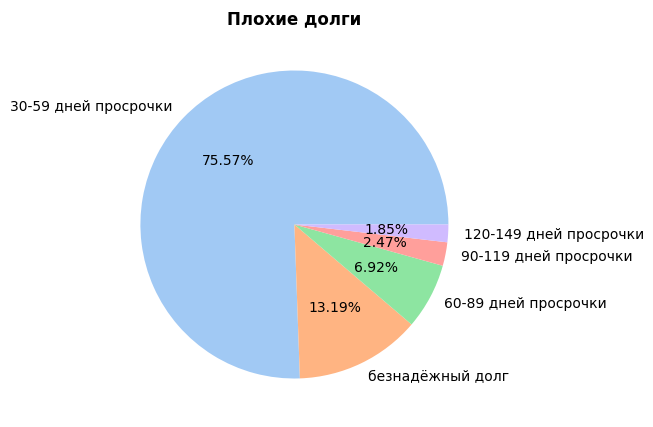

In [ ]:
# Круговая диаграмма для просмотра структуры плохих долгов
bad_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Плохой долг']
bad_debt_counts = bad_debt['STATUS'].value_counts()
bad_debt_ratios = bad_debt_counts / bad_debt_counts.sum()

colors = sns.color_palette('pastel')
fig = plt.subplots(figsize=(8, 5))

plt.pie(bad_debt_ratios, labels=bad_debt_ratios.index, autopct='%1.2f%%', colors=colors)
plt.title('Плохие долги', fontweight='bold')


Text(0.5, 1.0, 'Хорошие долги')

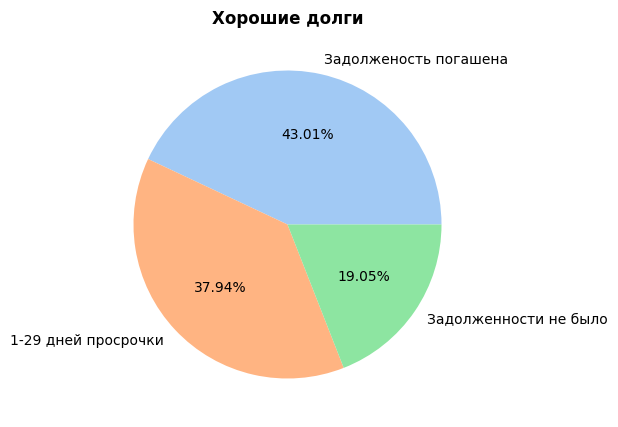

In [ ]:
# Круговая диаграмма для просмотра структуры хороших долгов
bad_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Хороший долг']
bad_debt_counts = bad_debt['STATUS'].value_counts()
bad_debt_ratios = bad_debt_counts / bad_debt_counts.sum()

colors = sns.color_palette('pastel')
fig = plt.subplots(figsize=(8, 5))

plt.pie(bad_debt_ratios, labels=bad_debt_ratios.index, autopct='%1.2f%%', colors=colors)
plt.title('Хорошие долги', fontweight='bold')


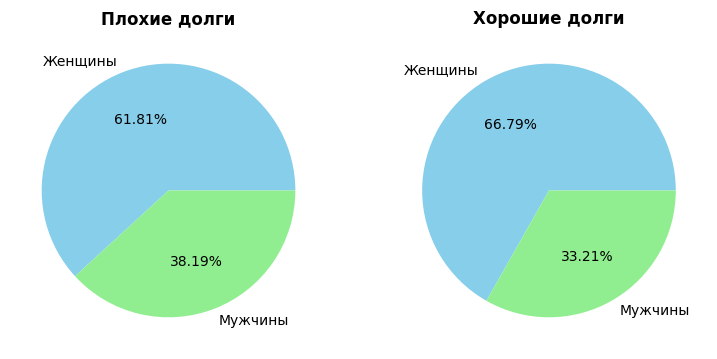

In [ ]:
# GENDER on debt
bad_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Плохой долг']
bad_debt_counts = bad_debt['CODE_GENDER'].value_counts()
good_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Хороший долг']
good_debt_counts = good_debt['CODE_GENDER'].value_counts()
bad_debt_ratios = bad_debt_counts / bad_debt_counts.sum()
good_debt_ratios = good_debt_counts / good_debt_counts.sum()

fig, axes = plt.subplots(1, 2, figsize=(9, 6))

# bad_debt
axes[0].pie(bad_debt_ratios, labels=bad_debt_ratios.index, autopct='%1.2f%%', colors=['skyblue', 'lightgreen'])
axes[0].set_title('Плохие долги', fontweight='bold')

# good_debt
axes[1].pie(good_debt_ratios, labels=good_debt_ratios.index, autopct='%1.2f%%', colors=['skyblue', 'lightgreen'])
axes[1].set_title('Хорошие долги', fontweight='bold')

plt.show()


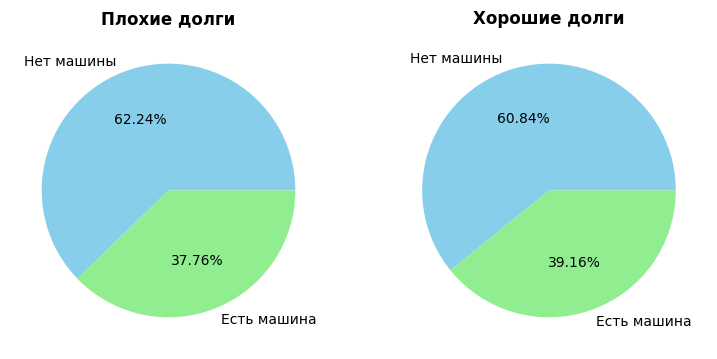

In [ ]:
# FLAG_OWN_CAR on debt
bad_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Плохой долг']
bad_debt_counts = bad_debt['FLAG_OWN_CAR'].value_counts()
good_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Хороший долг']
good_debt_counts = good_debt['FLAG_OWN_CAR'].value_counts()
bad_debt_ratios = bad_debt_counts / bad_debt_counts.sum()
good_debt_ratios = good_debt_counts / good_debt_counts.sum()

fig, axes = plt.subplots(1, 2, figsize=(9, 6))

# bad_debt
axes[0].pie(bad_debt_ratios, labels=bad_debt_ratios.index, autopct='%1.2f%%', colors=['skyblue', 'lightgreen'])
axes[0].set_title('Плохие долги', fontweight='bold')

# good_debt
axes[1].pie(good_debt_ratios, labels=good_debt_ratios.index, autopct='%1.2f%%', colors=['skyblue', 'lightgreen'])
axes[1].set_title('Хорошие долги', fontweight='bold')

plt.show()


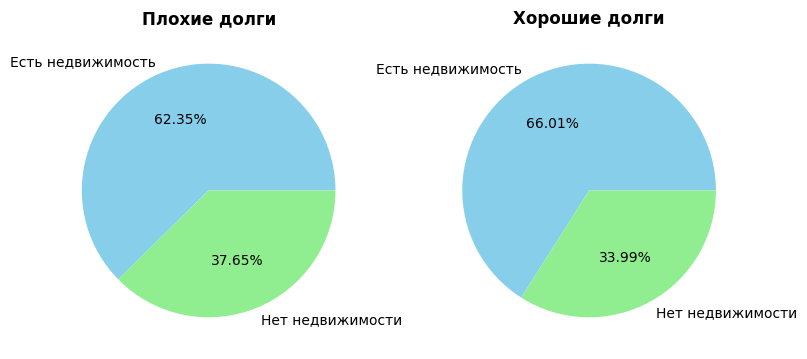

In [ ]:
# FLAG_OWN_REALTY on debt
bad_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Плохой долг']
bad_debt_counts = bad_debt['FLAG_OWN_REALTY'].value_counts()
good_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Хороший долг']
good_debt_counts = good_debt['FLAG_OWN_REALTY'].value_counts()
bad_debt_ratios = bad_debt_counts / bad_debt_counts.sum()
good_debt_ratios = good_debt_counts / good_debt_counts.sum()

fig, axes = plt.subplots(1, 2, figsize=(9, 6))

# bad_debt
axes[0].pie(bad_debt_ratios, labels=bad_debt_ratios.index, autopct='%1.2f%%', colors=['skyblue', 'lightgreen'])
axes[0].set_title('Плохие долги', fontweight='bold')

# good_debt
axes[1].pie(good_debt_ratios, labels=good_debt_ratios.index, autopct='%1.2f%%', colors=['skyblue', 'lightgreen'])
axes[1].set_title('Хорошие долги', fontweight='bold')

plt.show()


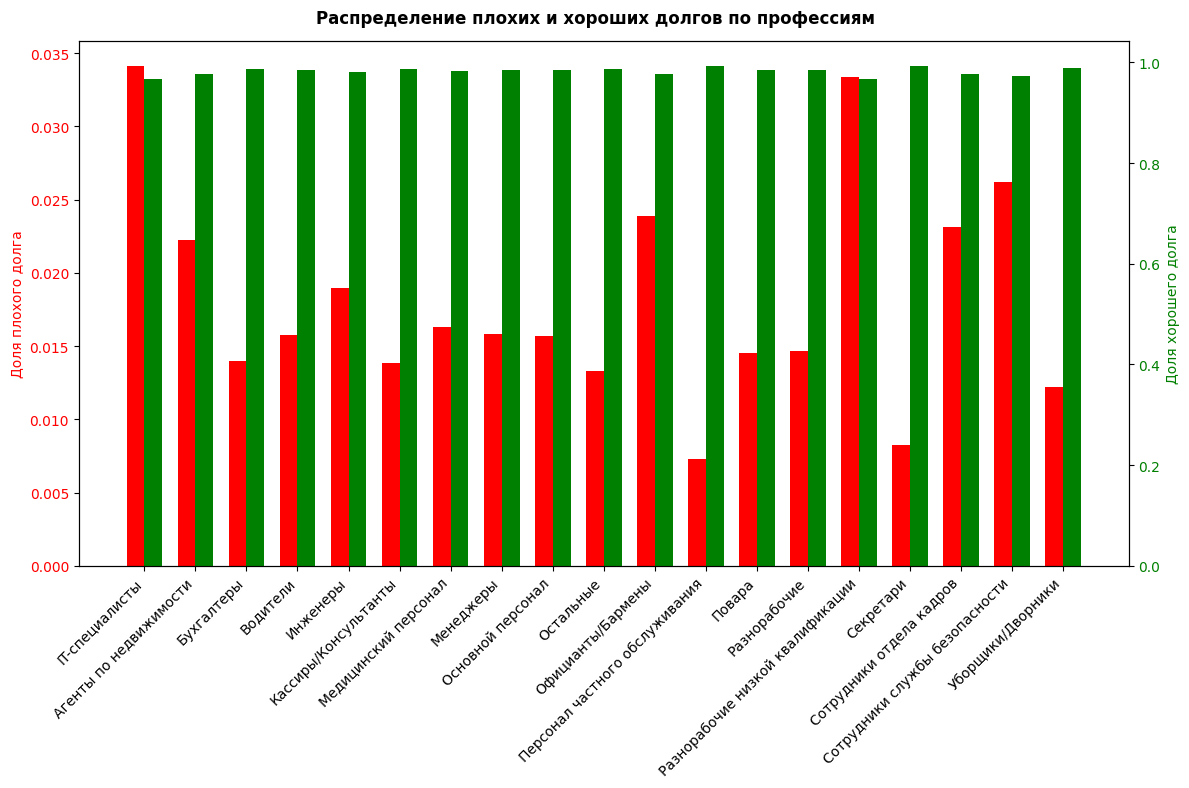

In [ ]:
# OCCUPATION_TYPE on debt
bad_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Плохой долг']
bad_debt_counts = bad_debt['OCCUPATION_TYPE'].value_counts()
good_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Хороший долг']
good_debt_counts = good_debt['OCCUPATION_TYPE'].value_counts()

# Расчет долей
total_counts = bad_debt_counts.add(good_debt_counts, fill_value=0)
bad_debt_ratios = (bad_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)
good_debt_ratios = (good_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)

more_good_debt = total_counts.index
fig, ax1 = plt.subplots(figsize=(12, 8))
index = np.arange(len(more_good_debt))
bar_width = 0.35

# Первая ось Y для плохого долга
ax1.set_ylabel('Доля плохого долга', color='red')
bars1 = ax1.bar(index, bad_debt_ratios[more_good_debt], bar_width, label='Плохой долг', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Вторая ось Y для хорошего долга
ax2 = ax1.twinx()
ax2.set_ylabel('Доля хорошего долга', color='green')
bars2 = ax2.bar(index + bar_width, good_debt_ratios[more_good_debt], bar_width, label='Хороший долг', color='green')
ax2.tick_params(axis='y', labelcolor='green')


ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(more_good_debt, rotation=45, ha='right')

fig.suptitle('Распределение плохих и хороших долгов по профессиям', fontweight='bold')
fig.tight_layout()

plt.show()


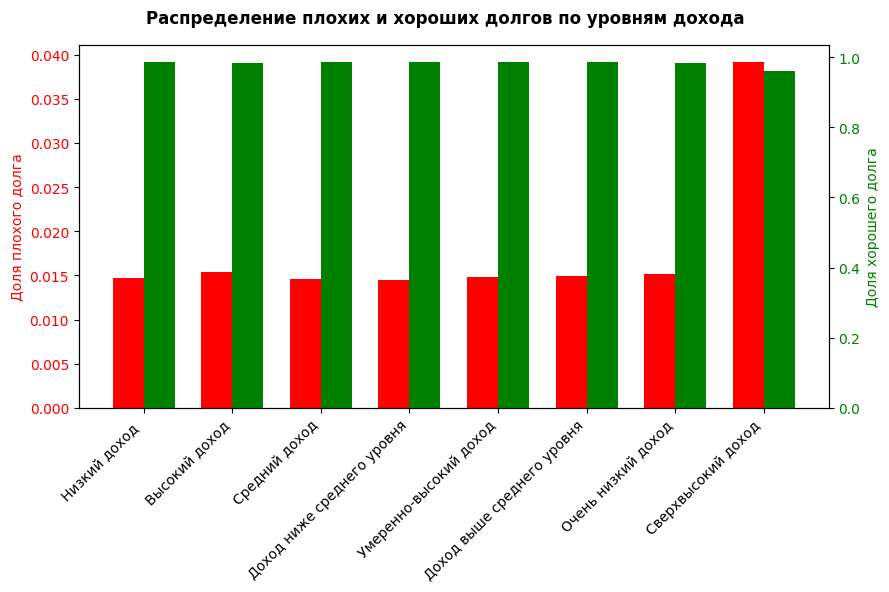

In [ ]:
# INCOME_GROUP on debt
bad_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Плохой долг']
bad_debt_counts = bad_debt['INCOME_GROUP'].value_counts()
good_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Хороший долг']
good_debt_counts = good_debt['INCOME_GROUP'].value_counts()

# Расчет долей
total_counts = bad_debt_counts.add(good_debt_counts, fill_value=0)
bad_debt_ratios = (bad_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)
good_debt_ratios = (good_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)

more_good_debt = total_counts.index
fig, ax1 = plt.subplots(figsize=(9, 6))
index = np.arange(len(more_good_debt))
bar_width = 0.35

# Первая ось Y для плохого долга
ax1.set_ylabel('Доля плохого долга', color='red')
bars1 = ax1.bar(index, bad_debt_ratios[more_good_debt], bar_width, label='Плохой долг', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Вторая ось Y для хорошего долга
ax2 = ax1.twinx()
ax2.set_ylabel('Доля хорошего долга', color='green')
bars2 = ax2.bar(index + bar_width, good_debt_ratios[more_good_debt], bar_width, label='Хороший долг', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Настройка меток на оси X
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(more_good_debt, rotation=45, ha='right')

fig.suptitle('Распределение плохих и хороших долгов по уровням дохода', fontweight='bold')
fig.tight_layout()

plt.show()


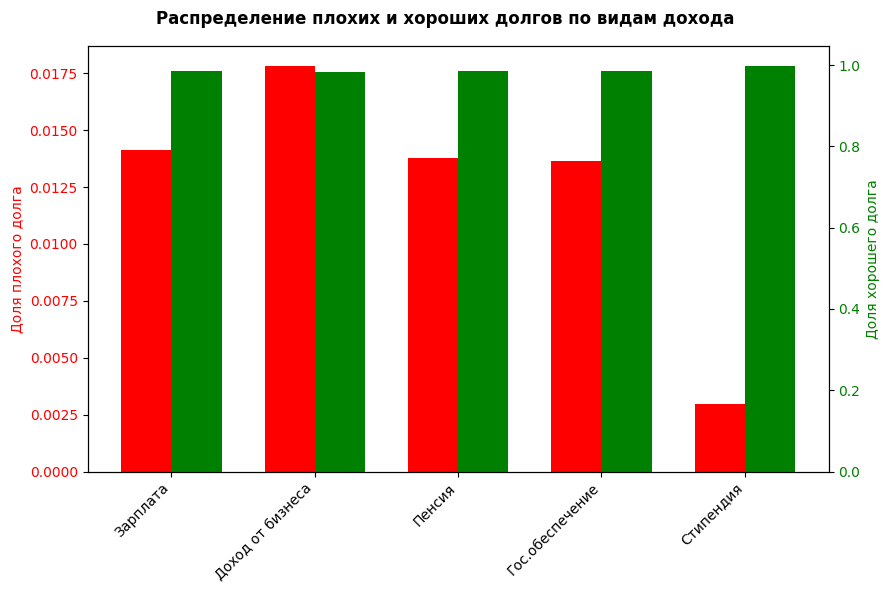

In [ ]:
# NAME_INCOME_TYPE on debt
bad_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Плохой долг']
bad_debt_counts = bad_debt['NAME_INCOME_TYPE'].value_counts()
good_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Хороший долг']
good_debt_counts = good_debt['NAME_INCOME_TYPE'].value_counts()

# Расчет долей
total_counts = bad_debt_counts.add(good_debt_counts, fill_value=0)
bad_debt_ratios = (bad_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)
good_debt_ratios = (good_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)

more_good_debt = total_counts.index
fig, ax1 = plt.subplots(figsize=(9, 6))
index = np.arange(len(more_good_debt))
bar_width = 0.35

# Первая ось Y для плохого долга
ax1.set_ylabel('Доля плохого долга', color='red')
bars1 = ax1.bar(index, bad_debt_ratios[more_good_debt], bar_width, label='Плохой долг', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Вторая ось Y для хорошего долга
ax2 = ax1.twinx()
ax2.set_ylabel('Доля хорошего долга', color='green')
bars2 = ax2.bar(index + bar_width, good_debt_ratios[more_good_debt], bar_width, label='Хороший долг', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Настройка меток на оси X
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(more_good_debt, rotation=45, ha='right')

fig.suptitle('Распределение плохих и хороших долгов по видам дохода', fontweight='bold')
fig.tight_layout()

plt.show()


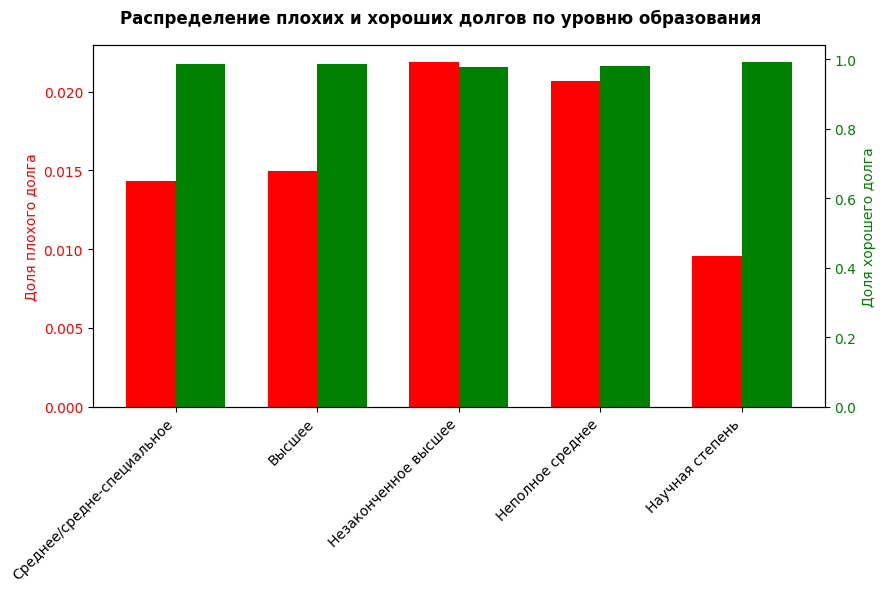

In [ ]:
# NAME_EDUCATION_TYPE on debt
bad_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Плохой долг']
bad_debt_counts = bad_debt['NAME_EDUCATION_TYPE'].value_counts()
good_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Хороший долг']
good_debt_counts = good_debt['NAME_EDUCATION_TYPE'].value_counts()

# Расчет долей
total_counts = bad_debt_counts.add(good_debt_counts, fill_value=0)
bad_debt_ratios = (bad_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)
good_debt_ratios = (good_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)

more_good_debt = total_counts.index
fig, ax1 = plt.subplots(figsize=(9, 6))
index = np.arange(len(more_good_debt))
bar_width = 0.35

# Первая ось Y для плохого долга
ax1.set_ylabel('Доля плохого долга', color='red')
bars1 = ax1.bar(index, bad_debt_ratios[more_good_debt], bar_width, label='Плохой долг', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Вторая ось Y для хорошего долга
ax2 = ax1.twinx()
ax2.set_ylabel('Доля хорошего долга', color='green')
bars2 = ax2.bar(index + bar_width, good_debt_ratios[more_good_debt], bar_width, label='Хороший долг', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Настройка меток на оси X
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(more_good_debt, rotation=45, ha='right')

fig.suptitle('Распределение плохих и хороших долгов по уровню образования', fontweight='bold')
fig.tight_layout()

plt.show()


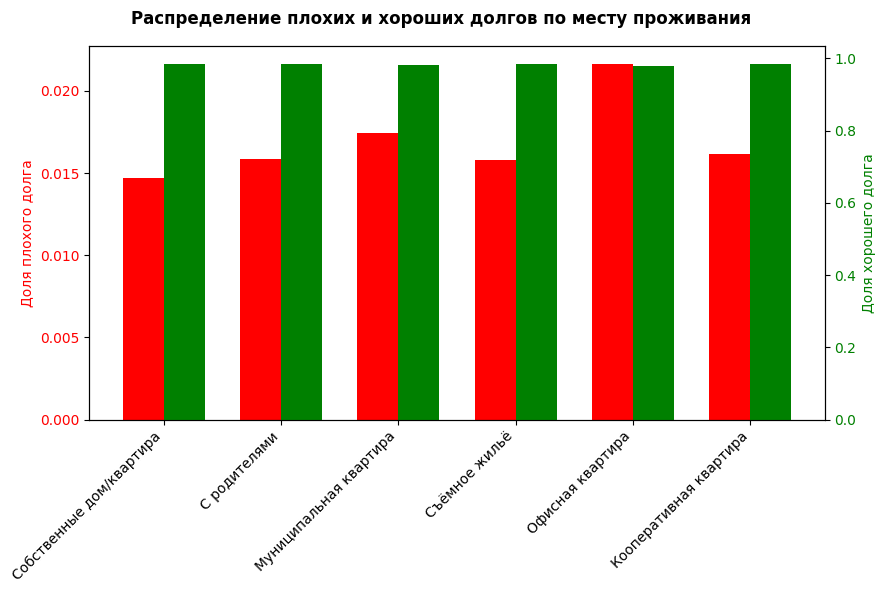

In [ ]:
# NAME_HOUSING_TYPE on debt
bad_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Плохой долг']
bad_debt_counts = bad_debt['NAME_HOUSING_TYPE'].value_counts()
good_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Хороший долг']
good_debt_counts = good_debt['NAME_HOUSING_TYPE'].value_counts()

# Расчет долей
total_counts = bad_debt_counts.add(good_debt_counts, fill_value=0)
bad_debt_ratios = (bad_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)
good_debt_ratios = (good_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)

more_good_debt = total_counts.index
fig, ax1 = plt.subplots(figsize=(9, 6))
index = np.arange(len(more_good_debt))
bar_width = 0.35

# Первая ось Y для плохого долга
ax1.set_ylabel('Доля плохого долга', color='red')
bars1 = ax1.bar(index, bad_debt_ratios[more_good_debt], bar_width, label='Плохой долг', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Вторая ось Y для хорошего долга
ax2 = ax1.twinx()
ax2.set_ylabel('Доля хорошего долга', color='green')
bars2 = ax2.bar(index + bar_width, good_debt_ratios[more_good_debt], bar_width, label='Хороший долг', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Настройка меток на оси X
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(more_good_debt, rotation=45, ha='right')

fig.suptitle('Распределение плохих и хороших долгов по месту проживания', fontweight='bold')
fig.tight_layout()

plt.show()


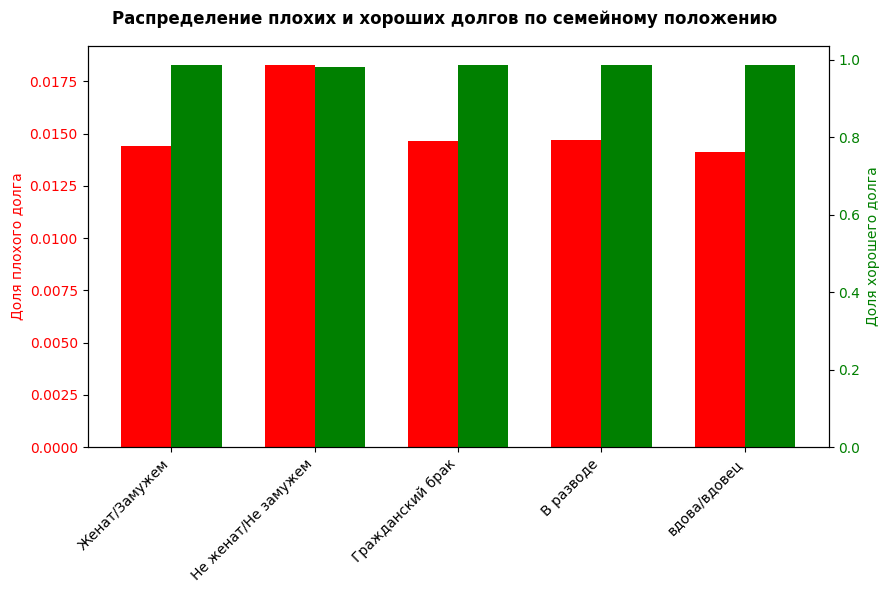

In [ ]:
# NAME_FAMILY_STATUS on debt
bad_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Плохой долг']
bad_debt_counts = bad_debt['NAME_FAMILY_STATUS'].value_counts()
good_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Хороший долг']
good_debt_counts = good_debt['NAME_FAMILY_STATUS'].value_counts()

# Расчет долей
total_counts = bad_debt_counts.add(good_debt_counts, fill_value=0)
bad_debt_ratios = (bad_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)
good_debt_ratios = (good_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)

more_good_debt = total_counts.index
fig, ax1 = plt.subplots(figsize=(9, 6))
index = np.arange(len(more_good_debt))
bar_width = 0.35

# Первая ось Y для плохого долга
ax1.set_ylabel('Доля плохого долга', color='red')
bars1 = ax1.bar(index, bad_debt_ratios[more_good_debt], bar_width, label='Плохой долг', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Вторая ось Y для хорошего долга
ax2 = ax1.twinx()
ax2.set_ylabel('Доля хорошего долга', color='green')
bars2 = ax2.bar(index + bar_width, good_debt_ratios[more_good_debt], bar_width, label='Хороший долг', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Настройка меток на оси X
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(more_good_debt, rotation=45, ha='right')

fig.suptitle('Распределение плохих и хороших долгов по семейному положению', fontweight='bold')
fig.tight_layout()

plt.show()


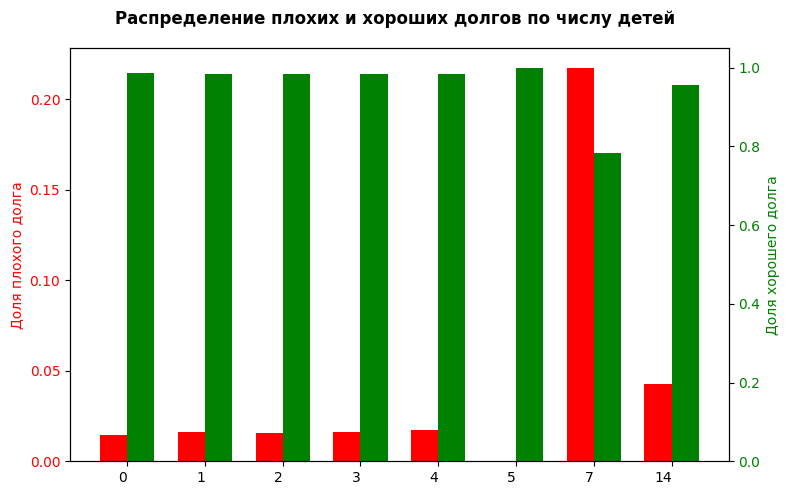

In [ ]:
# CNT_CHILDREN on debt
bad_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Плохой долг']
bad_debt_counts = bad_debt['CNT_CHILDREN'].value_counts()
good_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Хороший долг']
good_debt_counts = good_debt['CNT_CHILDREN'].value_counts()

# Расчет долей
total_counts = bad_debt_counts.add(good_debt_counts, fill_value=0)
bad_debt_ratios = (bad_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)
good_debt_ratios = (good_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)

more_good_debt = total_counts.index
fig, ax1 = plt.subplots(figsize=(8, 5))
index = np.arange(len(more_good_debt))
bar_width = 0.35

# Первая ось Y для плохого долга
ax1.set_ylabel('Доля плохого долга', color='red')
bars1 = ax1.bar(index, bad_debt_ratios[more_good_debt], bar_width, label='Плохой долг', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Вторая ось Y для хорошего долга
ax2 = ax1.twinx()
ax2.set_ylabel('Доля хорошего долга', color='green')
bars2 = ax2.bar(index + bar_width, good_debt_ratios[more_good_debt], bar_width, label='Хороший долг', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Настройка меток на оси X
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(more_good_debt, ha='right')

fig.suptitle('Распределение плохих и хороших долгов по числу детей', fontweight='bold')
fig.tight_layout()

plt.show()


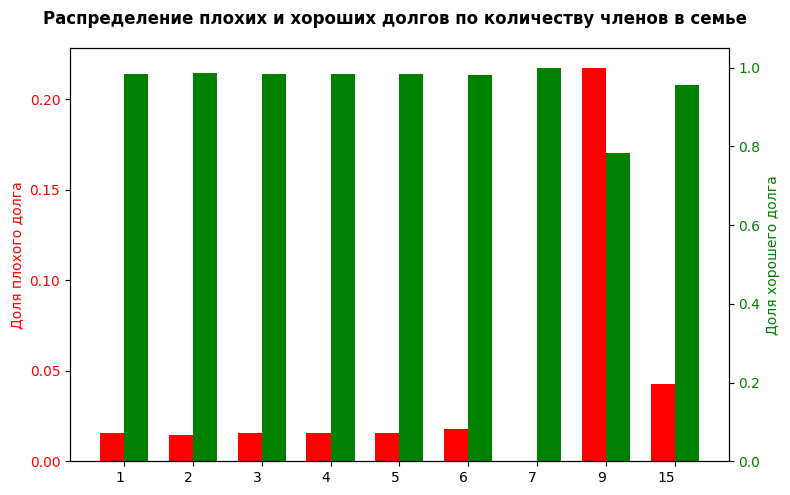

In [ ]:
# CNT_FAM_MEMBERS on debt
bad_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Плохой долг']
bad_debt_counts = bad_debt['CNT_FAM_MEMBERS'].value_counts()
good_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Хороший долг']
good_debt_counts = good_debt['CNT_FAM_MEMBERS'].value_counts()

# Расчет долей
total_counts = bad_debt_counts.add(good_debt_counts, fill_value=0)
bad_debt_ratios = (bad_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)
good_debt_ratios = (good_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)

more_good_debt = total_counts.index
fig, ax1 = plt.subplots(figsize=(8, 5))
index = np.arange(len(more_good_debt))
bar_width = 0.35

# Первая ось Y для плохого долга
ax1.set_ylabel('Доля плохого долга', color='red')
bars1 = ax1.bar(index, bad_debt_ratios[more_good_debt], bar_width, label='Плохой долг', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Вторая ось Y для хорошего долга
ax2 = ax1.twinx()
ax2.set_ylabel('Доля хорошего долга', color='green')
bars2 = ax2.bar(index + bar_width, good_debt_ratios[more_good_debt], bar_width, label='Хороший долг', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Настройка меток на оси X
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(more_good_debt, ha='right')

fig.suptitle('Распределение плохих и хороших долгов по количеству членов в семье', fontweight='bold')
fig.tight_layout()

plt.show()



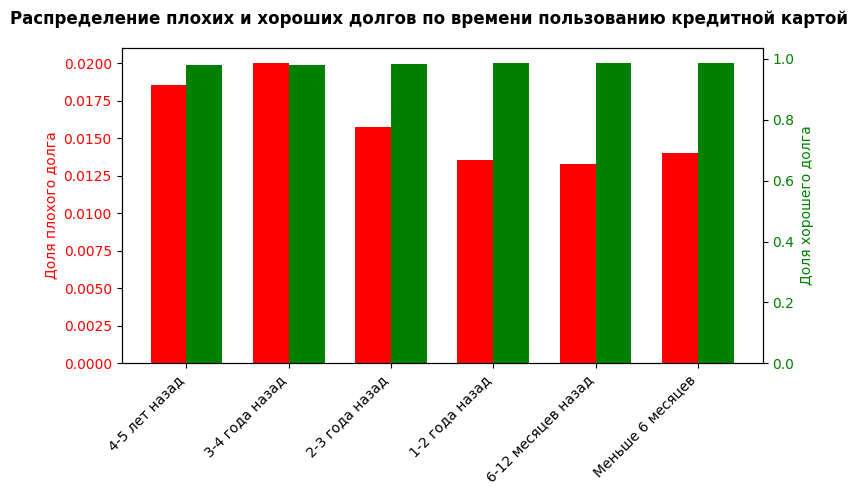

In [ ]:
# MONTHS_BALANCE_PERIOD on debt
bad_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Плохой долг']
bad_debt_counts = bad_debt['MONTHS_BALANCE_PERIOD'].value_counts()
good_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Хороший долг']
good_debt_counts = good_debt['MONTHS_BALANCE_PERIOD'].value_counts()

# Расчет долей
total_counts = bad_debt_counts.add(good_debt_counts, fill_value=0)
bad_debt_ratios = (bad_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)
good_debt_ratios = (good_debt_counts / total_counts).reindex(total_counts.index, fill_value=0)

# Изменяем порядок столбцов
labels_rus = ['4-5 лет назад', '3-4 года назад', '2-3 года назад', '1-2 года назад', '6-12 месяцев назад', 'Меньше 6 месяцев']
bad_debt_ratios = bad_debt_ratios.reindex(labels_rus)
good_debt_ratios = good_debt_ratios.reindex(labels_rus)

# Создаем график
fig, ax1 = plt.subplots(figsize=(8, 5))
index = np.arange(len(labels_rus))
bar_width = 0.35

# Первая ось Y для плохого долга
ax1.set_ylabel('Доля плохого долга', color='red')
bars1 = ax1.bar(index, bad_debt_ratios, bar_width, label='Плохой долг', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Вторая ось Y для хорошего долга
ax2 = ax1.twinx()
ax2.set_ylabel('Доля хорошего долга', color='green')
bars2 = ax2.bar(index + bar_width, good_debt_ratios, bar_width, label='Хороший долг', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Настройка меток на оси X
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(labels_rus, rotation=45, ha='right')

fig.suptitle('Распределение плохих и хороших долгов по времени пользованию кредитной картой', fontweight='bold')
fig.tight_layout()

plt.show()


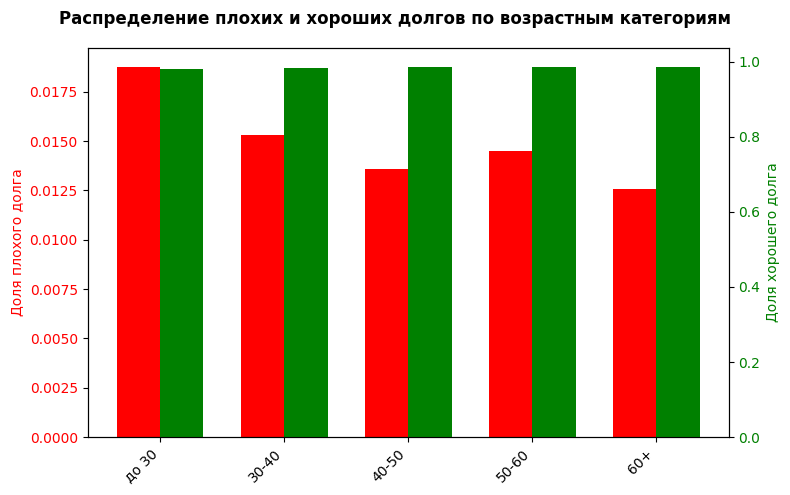

In [ ]:
# DAYS_BIRTH_DT on debt

# Преобразование поля DAYS_BIRTH_DT в формат даты
df_rus['DAYS_BIRTH_DT'] = pd.to_datetime(df_rus['DAYS_BIRTH_DT'])

# Вычисление возраста
df_rus['AGE'] = (datetime.today() - df_rus['DAYS_BIRTH_DT']).dt.days // 365

# Разделение на категории по возрасту
df_rus['AGE_GROUP'] = pd.cut(df_rus['AGE'], bins=[0, 30, 40, 50, 60, 100], labels=['до 30', '30-40', '40-50', '50-60', '60+'])

bad_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Плохой долг']
good_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Хороший долг']
bad_debt_counts = bad_debt['AGE_GROUP'].value_counts().reindex(df_rus['AGE_GROUP'].cat.categories)
good_debt_counts = good_debt['AGE_GROUP'].value_counts().reindex(df_rus['AGE_GROUP'].cat.categories)
total_counts = bad_debt_counts.add(good_debt_counts, fill_value=0)
bad_debt_ratios = (bad_debt_counts / total_counts).fillna(0)
good_debt_ratios = (good_debt_counts / total_counts).fillna(0)

# Изменение порядка столбцов
labels_rus = ['до 30', '30-40', '40-50', '50-60', '60+']
bad_debt_ratios = bad_debt_ratios.reindex(labels_rus)
good_debt_ratios = good_debt_ratios.reindex(labels_rus)

fig, ax1 = plt.subplots(figsize=(8, 5))
index = np.arange(len(labels_rus))
bar_width = 0.35

# Первая ось Y для плохого долга
ax1.set_ylabel('Доля плохого долга', color='red')
bars1 = ax1.bar(index, bad_debt_ratios, bar_width, label='Плохой долг', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Вторая ось Y для хорошего долга
ax2 = ax1.twinx()
ax2.set_ylabel('Доля хорошего долга', color='green')
bars2 = ax2.bar(index + bar_width, good_debt_ratios, bar_width, label='Хороший долг', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Настройка меток на оси X
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(labels_rus, rotation=45, ha='right')

fig.suptitle('Распределение плохих и хороших долгов по возрастным категориям', fontweight='bold')
fig.tight_layout()

plt.show()


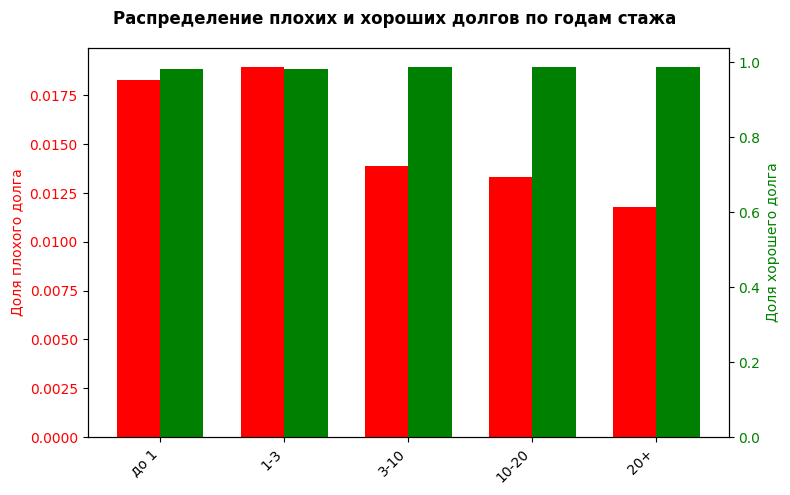

In [ ]:
# DAYS_EMPLOYED_DT on debt

# Преобразование поля DAYS_EMPLOYED_DT в формат даты
df_rus['DAYS_EMPLOYED_DT'] = pd.to_datetime(df_rus['DAYS_EMPLOYED_DT'])

# Вычисление стажа
df_rus['WORK_EXPERIENCE'] = (datetime.today() - df_rus['DAYS_EMPLOYED_DT']).dt.days // 365

# Разделение на категории по возрасту
df_rus['WORK_EXPERIENCE_GROUP'] = pd.cut(df_rus['WORK_EXPERIENCE'], bins=[0, 1, 3, 10, 20, 100], labels=['до 1', '1-3', '3-10', '10-20', '20+'])

bad_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Плохой долг']
good_debt = df_rus[df_rus['CREDIT_CHARACTERISTICS'] == 'Хороший долг']
bad_debt_counts = bad_debt['WORK_EXPERIENCE_GROUP'].value_counts().reindex(df_rus['WORK_EXPERIENCE_GROUP'].cat.categories)
good_debt_counts = good_debt['WORK_EXPERIENCE_GROUP'].value_counts().reindex(df_rus['WORK_EXPERIENCE_GROUP'].cat.categories)
total_counts = bad_debt_counts.add(good_debt_counts, fill_value=0)
bad_debt_ratios = (bad_debt_counts / total_counts).fillna(0)
good_debt_ratios = (good_debt_counts / total_counts).fillna(0)

# Изменение порядка столбцов
labels_rus = ['до 1', '1-3', '3-10', '10-20', '20+']
bad_debt_ratios = bad_debt_ratios.reindex(labels_rus)
good_debt_ratios = good_debt_ratios.reindex(labels_rus)

fig, ax1 = plt.subplots(figsize=(8, 5))
index = np.arange(len(labels_rus))
bar_width = 0.35

# Первая ось Y для плохого долга
ax1.set_ylabel('Доля плохого долга', color='red')
bars1 = ax1.bar(index, bad_debt_ratios, bar_width, label='Плохой долг', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Вторая ось Y для хорошего долга
ax2 = ax1.twinx()
ax2.set_ylabel('Доля хорошего долга', color='green')
bars2 = ax2.bar(index + bar_width, good_debt_ratios, bar_width, label='Хороший долг', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Настройка меток на оси X
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(labels_rus, rotation=45, ha='right')

fig.suptitle('Распределение плохих и хороших долгов по годам стажа', fontweight='bold')
fig.tight_layout()

plt.show()


### Диаграммы Санкей

Диаграмма Сэнки, показывает взаимосвязи в наборе данных об одобрении кредитной карты. Цель состоит в том, чтобы наглядно представить, как кандидаты распределяются по этим переменным, и выявить любые заметные закономерности.


In [ ]:
# Сгруппируем данные
realty_to_housing = df_rus.groupby(['NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE'], observed=True).size().reset_index(name='count')
to_income_type = df_rus.groupby(['NAME_INCOME_TYPE', 'FLAG_OWN_REALTY'], observed=True).size().reset_index(name='count')
to_status = df_rus.groupby(['FLAG_OWN_REALTY', 'CREDIT_CHARACTERISTICS'], observed=True).size().reset_index(name='count')
to_status_clarification = df_rus.groupby(['CREDIT_CHARACTERISTICS', 'STATUS'], observed=True).size().reset_index(name='count')

# Извлечём уникальные категории для маркировки
unique_house_types = realty_to_housing['NAME_HOUSING_TYPE'].unique().tolist()
unique_income_types = realty_to_housing['NAME_INCOME_TYPE'].unique().tolist()
unique_realty = to_income_type['FLAG_OWN_REALTY'].unique().tolist()
unique_status = to_status['CREDIT_CHARACTERISTICS'].unique().tolist()
unique_status_clarification = to_status_clarification['STATUS'].unique().tolist()

# Получим метки для диаграммы
labels = unique_realty + unique_income_types + unique_house_types + unique_status + unique_status_clarification
label_to_index = {label: idx for idx, label in enumerate(labels)}

source = []
target = []
value = []

for _, row in realty_to_housing.iterrows():
    source.append(label_to_index[row['NAME_HOUSING_TYPE']])
    target.append(label_to_index[row['NAME_INCOME_TYPE']])
    value.append(row['count'])

for _, row in to_income_type.iterrows():
    source.append(label_to_index[row['NAME_INCOME_TYPE']])
    target.append(label_to_index[row['FLAG_OWN_REALTY']])
    value.append(row['count'])

for _, row in to_status.iterrows():
    source.append(label_to_index[row['FLAG_OWN_REALTY']])
    target.append(label_to_index[row['CREDIT_CHARACTERISTICS']])
    value.append(row['count'])

for _, row in to_status_clarification.iterrows():
    source.append(label_to_index[row['CREDIT_CHARACTERISTICS']])
    target.append(label_to_index[row['STATUS']])
    value.append(row['count'])

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(title_text="Тип жилья / Тип дохода / Владение недвижимостью / Вид долга / Уточнённый статус по кредиту", font_size=10)
fig.show()


In [ ]:
# Сгруппируем данные
gender_to_edu = df_rus.groupby(['CODE_GENDER', 'INCOME_GROUP'], observed=True).size().reset_index(name='count')
to_edu = df_rus.groupby(['INCOME_GROUP', 'NAME_EDUCATION_TYPE'], observed=True).size().reset_index(name='count')
to_family_status = df_rus.groupby(['NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS'], observed=True).size().reset_index(name='count')
to_status = df_rus.groupby(['NAME_FAMILY_STATUS', 'CREDIT_CHARACTERISTICS'], observed=True).size().reset_index(name='count')

# Извлечём уникальные категории для маркировки
unique_gender_types = gender_to_edu['CODE_GENDER'].unique().tolist()
unique_income_group = to_edu['INCOME_GROUP'].unique().tolist()
unique_edu = to_family_status['NAME_EDUCATION_TYPE'].unique().tolist()
unique_family_status = to_family_status['NAME_FAMILY_STATUS'].unique().tolist()
unique_status = to_status['CREDIT_CHARACTERISTICS'].unique().tolist()

# Получим метки для диаграммы
labels =  unique_gender_types + unique_income_group + unique_edu + unique_family_status + unique_status
label_to_index = {label: idx for idx, label in enumerate(labels)}

source = []
target = []
value = []

for _, row in gender_to_edu.iterrows():
    source.append(label_to_index[row['CODE_GENDER']])
    target.append(label_to_index[row['INCOME_GROUP']])
    value.append(row['count'])

for _, row in to_edu.iterrows():
    source.append(label_to_index[row['INCOME_GROUP']])
    target.append(label_to_index[row['NAME_EDUCATION_TYPE']])
    value.append(row['count'])

for _, row in to_family_status.iterrows():
    source.append(label_to_index[row['NAME_EDUCATION_TYPE']])
    target.append(label_to_index[row['NAME_FAMILY_STATUS']])
    value.append(row['count'])

for _, row in to_status.iterrows():
    source.append(label_to_index[row['NAME_FAMILY_STATUS']])
    target.append(label_to_index[row['CREDIT_CHARACTERISTICS']])
    value.append(row['count'])

fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=labels),
    link=dict(source=source, target=target, value=value)
)])

fig.update_layout(title_text="Пол / Уровень дохода / Уровень образования / Семейное положение /  Вид долга", font_size=10)

fig.show()


In [ ]:
# Сгруппируем данные
gender_to_status = df_rus.groupby(['CODE_GENDER', 'STATUS'], observed=True).size().reset_index(name='count')
to_status = df_rus.groupby(['STATUS', 'CREDIT_CHARACTERISTICS'], observed=True).size().reset_index(name='count')

# Извлечём уникальные категории для маркировки
unique_gender_types = gender_to_status['CODE_GENDER'].unique().tolist()
unique_status_group = gender_to_status['STATUS'].unique().tolist()
unique_status = to_status['CREDIT_CHARACTERISTICS'].unique().tolist()

# Получим метки для диаграммы
labels =  unique_gender_types + unique_status_group + unique_status
label_to_index = {label: idx for idx, label in enumerate(labels)}

source = []
target = []
value = []

for _, row in gender_to_status.iterrows():
    source.append(label_to_index[row['CODE_GENDER']])
    target.append(label_to_index[row['STATUS']])
    value.append(row['count'])

for _, row in to_status.iterrows():
    source.append(label_to_index[row['STATUS']])
    target.append(label_to_index[row['CREDIT_CHARACTERISTICS']])
    value.append(row['count'])

fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=labels),
    link=dict(source=source, target=target, value=value)
)])

fig.update_layout(title_text="Пол / Статус по задолженности /  Вид долга", font_size=10)

fig.show()


## Подготовка данных к созданию модели

In [ ]:
columns_to_select = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CREDIT_CHARACTERISTICS']
df = merged_df[columns_to_select]
df


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CREDIT_CHARACTERISTICS
0,Male,Yes Car,Yes Property,good_debt
1,Male,Yes Car,Yes Property,good_debt
2,Male,Yes Car,Yes Property,good_debt
3,Male,Yes Car,Yes Property,good_debt
4,Male,Yes Car,Yes Property,good_debt
...,...,...,...,...
777710,Male,No Car,Yes Property,good_debt
777711,Male,No Car,Yes Property,bad_debt
777712,Male,No Car,Yes Property,bad_debt
777713,Male,No Car,Yes Property,good_debt


In [ ]:
# Применяем one-hot encoding к столбцу CODE_GENDER
df = pd.get_dummies(df, columns=['CODE_GENDER'], prefix='GENDER')

# Замена значений в столбцах FLAG_OWN_CAR, FLAG_OWN_REALTY и CREDIT_CHARACTERISTICS
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].replace({'Yes Car': 1, 'No Car': 0})
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].replace({'Yes Property': 1, 'No Property': 0})
df['CREDIT_CHARACTERISTICS'] = df['CREDIT_CHARACTERISTICS'].replace({'good_debt': 1, 'bad_debt': 0})

# Преобразование значений 1 и 0 в булевый тип данных
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].astype(bool)
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].astype(bool)
df['CREDIT_CHARACTERISTICS'] = df['CREDIT_CHARACTERISTICS'].astype(bool)

# Выбор нужных столбцов
df = df[['GENDER_Male', 'GENDER_Female', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'CREDIT_CHARACTERISTICS']].copy()

df

,GENDER_Male,GENDER_Female,FLAG_OWN_REALTY,FLAG_OWN_CAR,CREDIT_CHARACTERISTICS
0,True,False,True,True,True
1,True,False,True,True,True
2,True,False,True,True,True
3,True,False,True,True,True
4,True,False,True,True,True
...,...,...,...,...,...
777710,True,False,True,False,True
777711,True,False,True,False,False
777712,True,False,True,False,False
777713,True,False,True,False,True


## Обучение и тестирование модели

In [ ]:
# Перемешиваем данные
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Разделяем данные на выборкие
X = df.drop(columns=['CREDIT_CHARACTERISTICS'])
y = df['CREDIT_CHARACTERISTICS']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Обучаем модель RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Проверяем модель на тестовой выборке
y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9853995358196769


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


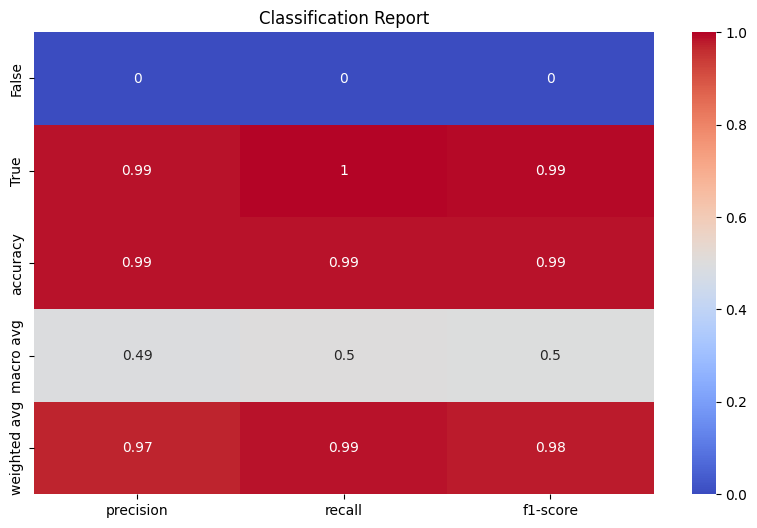

In [ ]:
# Создаем отчет классификации
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Удаляем столбец 'support'
df_report.drop(['support'], inplace=True, axis=1)

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.astype(float), annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()


In [ ]:
df_report

,precision,recall,f1-score
False,0.000000,0.0000,0.000000
True,0.985400,1.0000,0.992646
accuracy,0.985400,0.9854,0.985400
macro avg,0.492700,0.5000,0.496323
weighted avg,0.971012,0.9854,0.978153
